In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-data-analysis/UberDataset.csv
/kaggle/input/uber-data/UberDataset.csv


In [43]:
df = pd.read_csv("/kaggle/input/uber-data-analysis/UberDataset.csv")

In [44]:
df.head(50)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [45]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [47]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [48]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df.dropna(inplace = True)

In [49]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [50]:
df.drop_duplicates(inplace = True)

In [51]:
print(df.duplicated().sum())

0


In [95]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors="coerce")

In [52]:
df['start day']=df['START_DATE']
df['start day']

0       01-01-2016 21:11
1       01-02-2016 01:25
2       01-02-2016 20:25
3       01-05-2016 17:31
4       01-06-2016 14:42
              ...       
1150     12/31/2016 1:07
1151    12/31/2016 13:24
1152    12/31/2016 15:03
1153    12/31/2016 21:32
1154    12/31/2016 22:08
Name: start day, Length: 1154, dtype: object

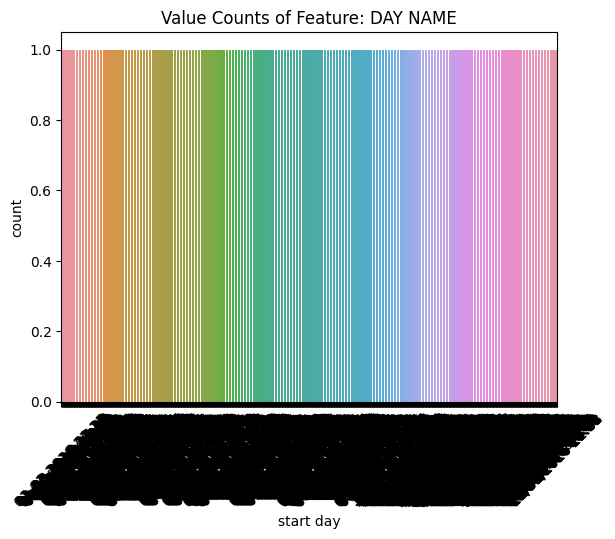

In [82]:
sns.countplot(x=df["start day"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)
plt.show()

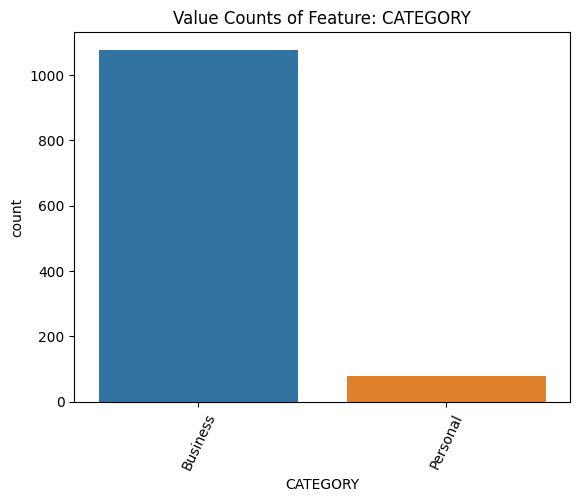

In [83]:
sns.countplot(x=df["CATEGORY"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation= 65)
plt.show()

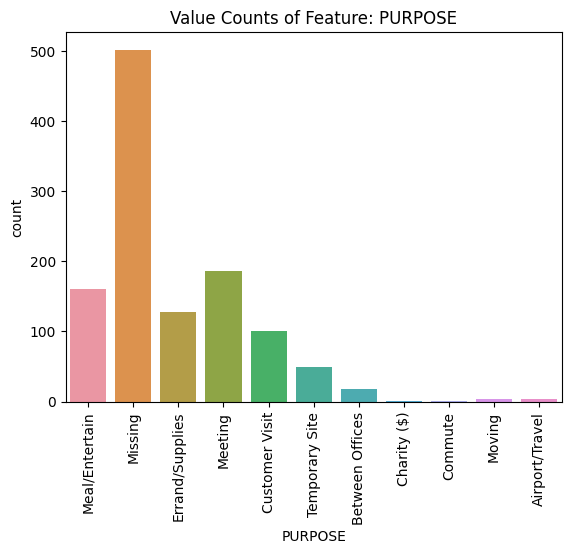

In [64]:
sns.countplot(x = df["PURPOSE"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation= 90)
plt.show()

In [96]:
df["duration in minutes"]=(df["END_DATE"]-df["START_DATE"]).dt.total_seconds() / 60

In [97]:
df['duration in minutes']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: duration in minutes, Length: 1154, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


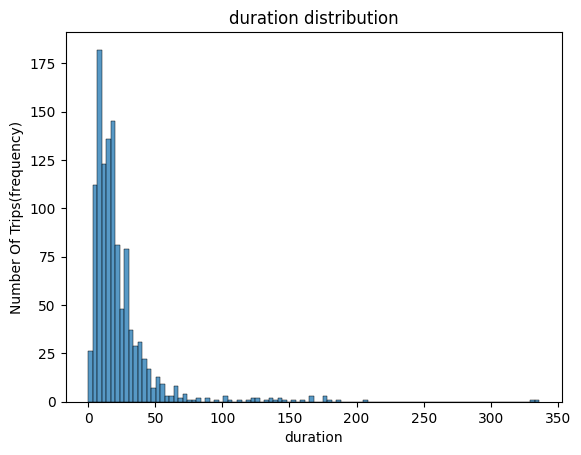

In [100]:
sns.histplot(df['duration in minutes'])
plt.xlabel('duration')
plt.ylabel('Number Of Trips(frequency)')
plt.title('duration distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


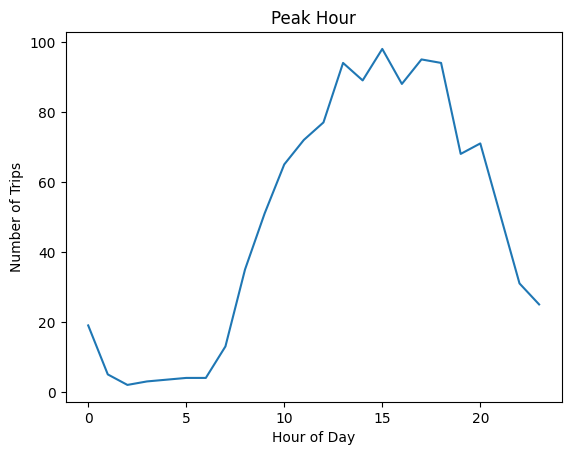

In [108]:
hour_counts = df['hour'].value_counts().sort_index()
hour_df = hour_counts.reset_index()
hour_df.columns = ['hour', 'count']

sns.lineplot(data=hour_df, x='hour', y='count')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Peak Hour')
plt.show()


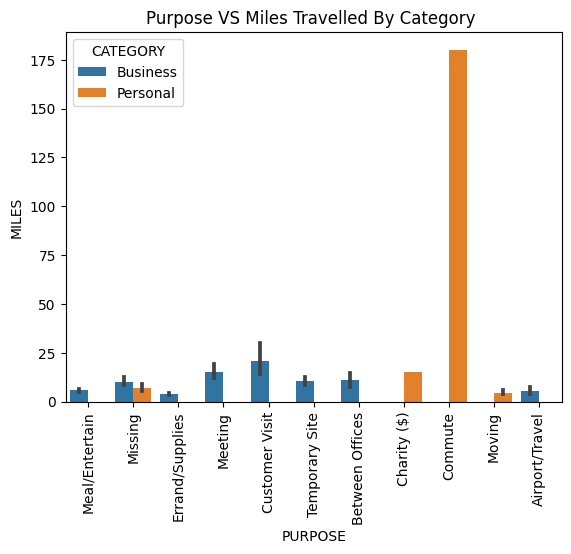

In [110]:
sns.barplot(x= df["PURPOSE"], y= df['MILES'],hue = df["CATEGORY"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)
plt.show()